<center>
<img src="images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de  [Yury Kashnitsky](https://yorko.github.io). Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

# <center>  Visual data analysis
## Ejercicio02 Analizando pasajeros del "Titanic" 

**Complete el código que falta ("# You code here"). No es necesario seleccionar respuestas en un formulario web.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

**Leer datos**

In [3]:
train_df = pd.read_csv("/home/floormolina99/Aprendizaje Automatico/titanic_train.csv", 
                       index_col='PassengerId') 

In [4]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_df.info()
#Agrego definicion de las columnas
#survival - Survival (0 = No; 1 = Yes)
#class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#name - Name
#sex - Sex
#age - Age
#sibsp - Number of Siblings/Spouses Aboard
#parch - Number of Parents/Children Aboard
#ticket - Ticket Number
#fare - Passenger Fare
#cabin - Cabin
#embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
#boat - Lifeboat (if survived)
#body - Body number (if did not survive and body was recovered)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Vamos a sacar la variable`Cabin`, y todas las filas con NaN's y missing values.**

In [7]:
train_df = train_df.drop('Cabin', axis=1).dropna()

In [8]:
train_df.shape

(712, 10)

**1. Cree una figura para visualizar todos los diagramas de dispersión para cada par de características `Age`, `Fare`, `SibSp`, `Parch` y `Survived`. ( `scatter_matrix ` de Pandas or `pairplot` de Seaborn)**

Primero saco los pares de los que voy a hacer dispersión
1. Age y Fare (AF)
2. Age y SibSp (AS)
3. Age y Parch (AP)
4. Age y Survived (ASU)
5. Fare y SibSp (FS)
6. Fare y Parch (FP)
7. Fare y Survived (FSU)
8. SibSp y Parch (SP)
9. SibSp y Survived (SSU)
10. Parch y Survived (PSU)

/home/floormolina99/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


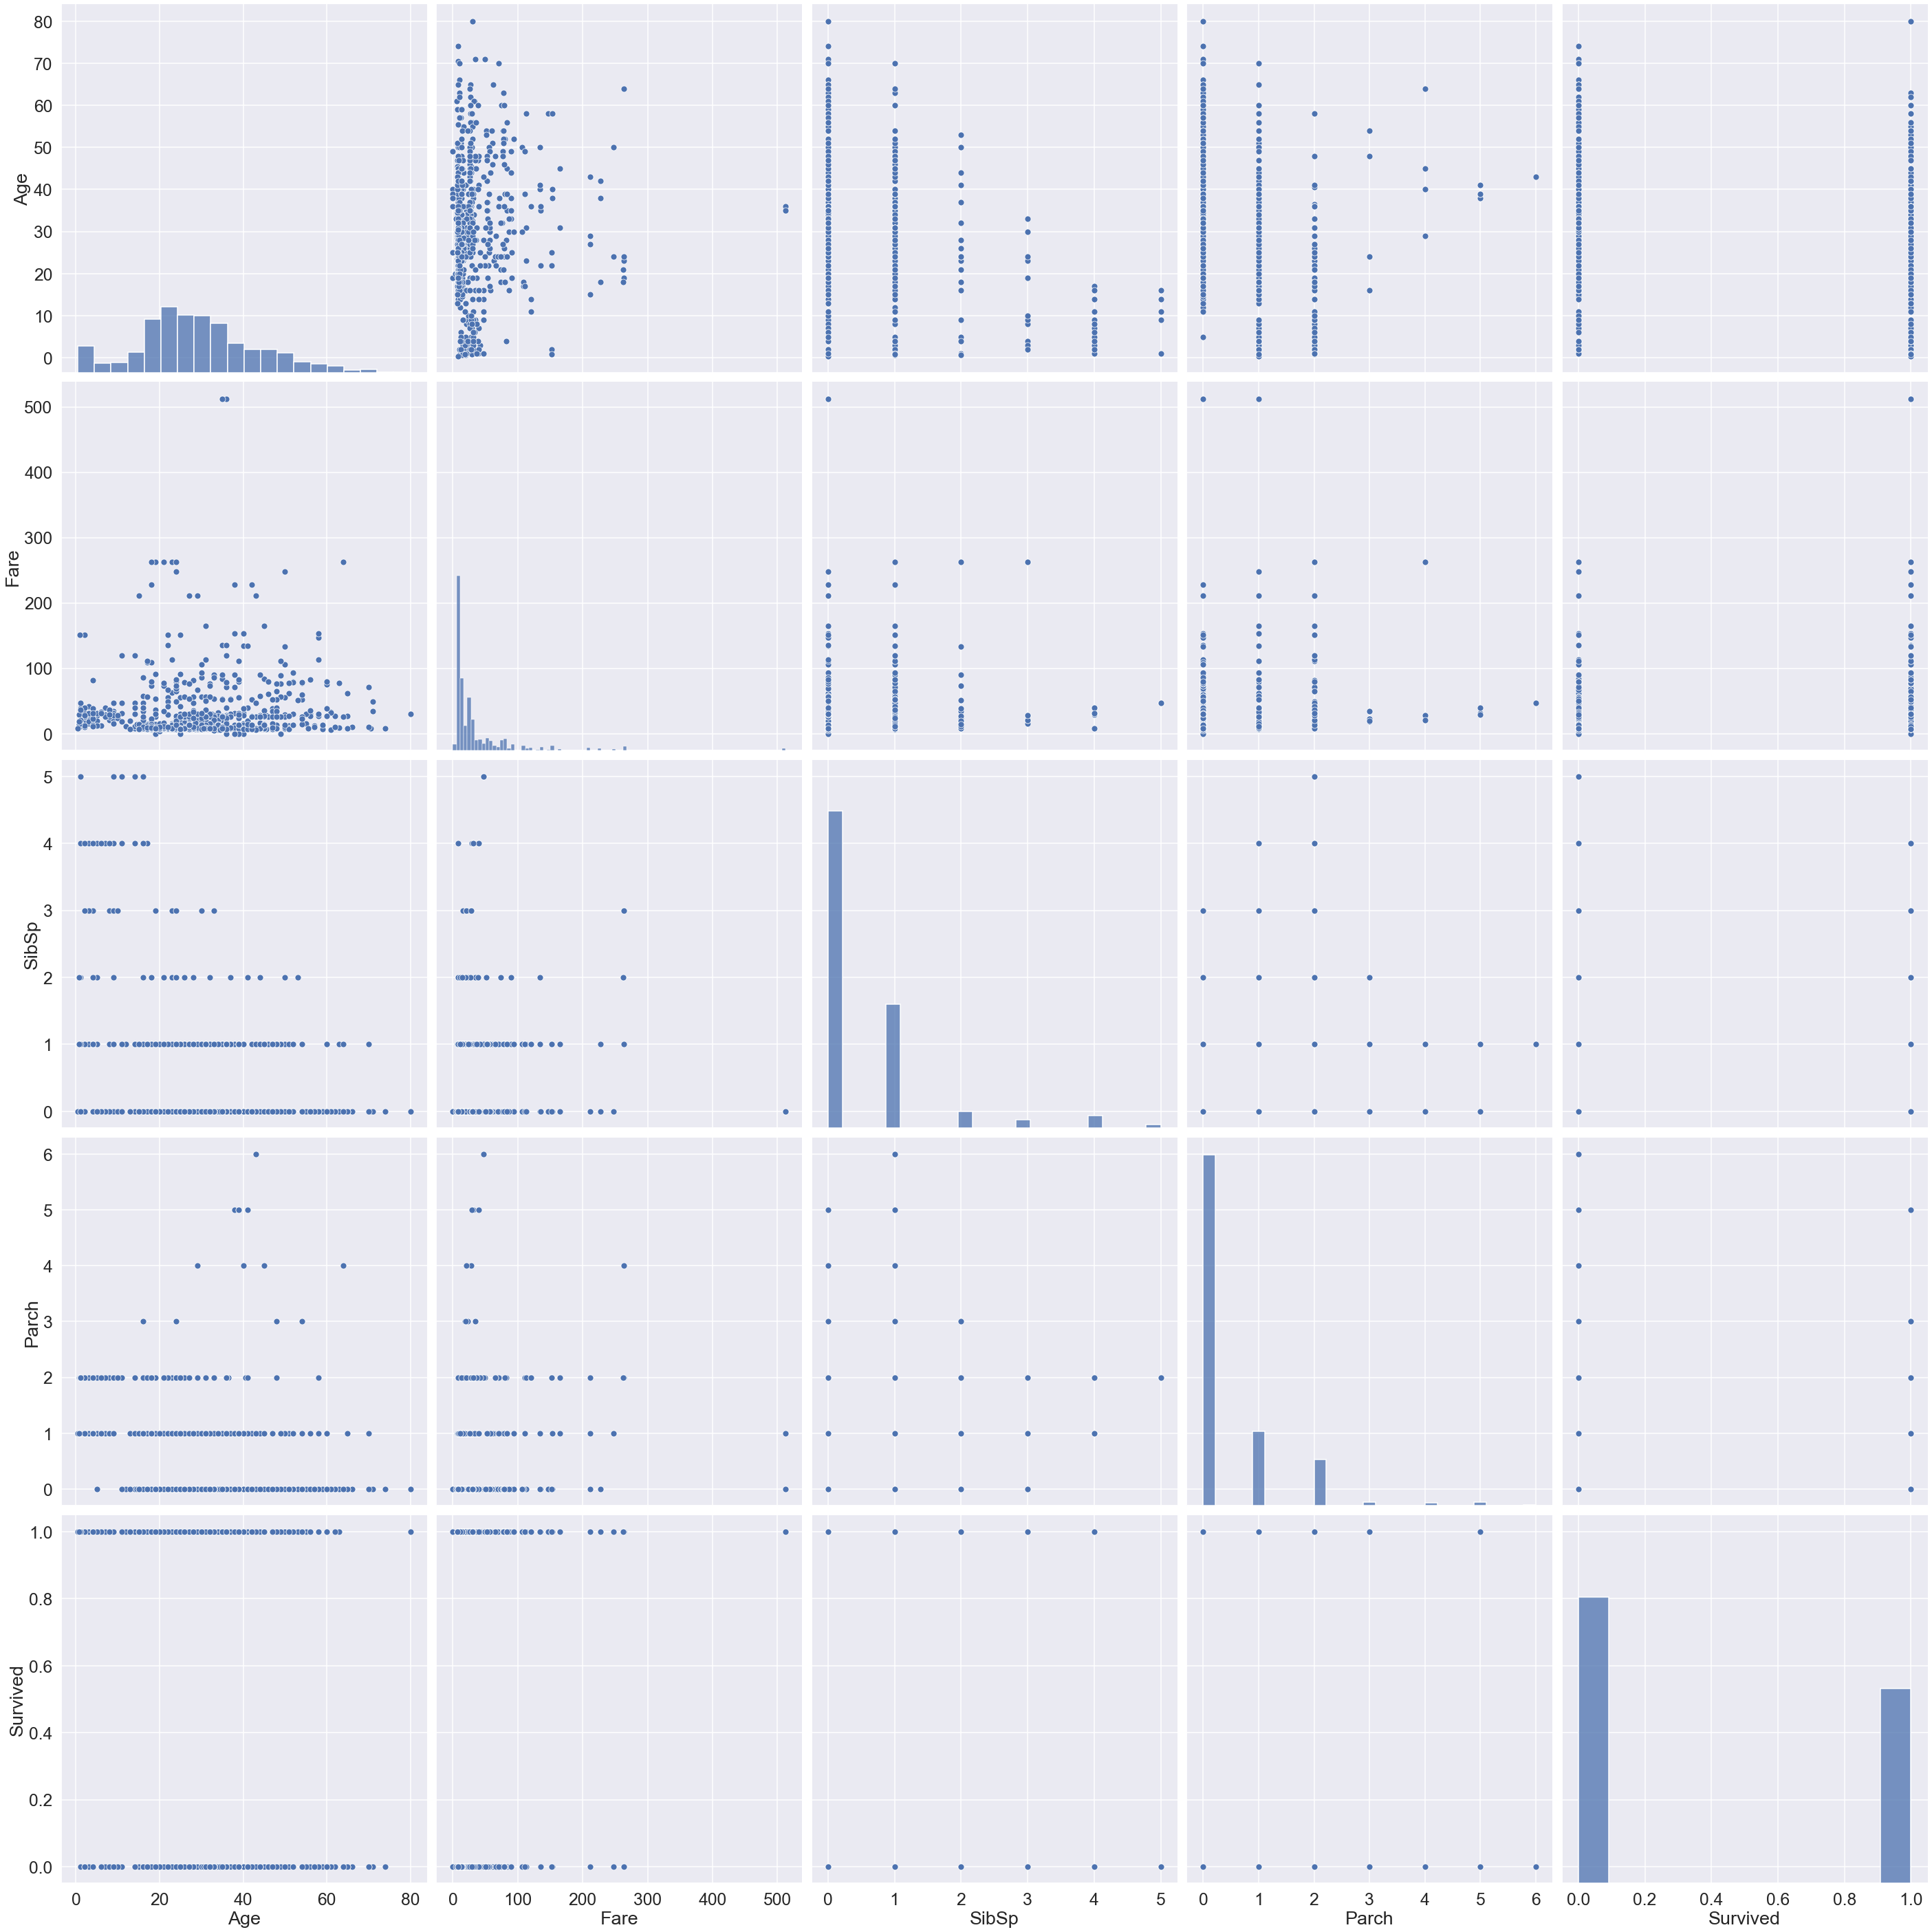

In [9]:
sns.set_context('talk',font_scale=1.5)
sns.color_palette('hls',8)
sns.pairplot(data=train_df,vars=['Age','Fare','SibSp','Parch','Survived'],size=8)

In [10]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.1


**2. ¿Cómo depende el precio del boleto (`Fare`) de `Pclass`? Construya un diagrama de caja (boxplot).**

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

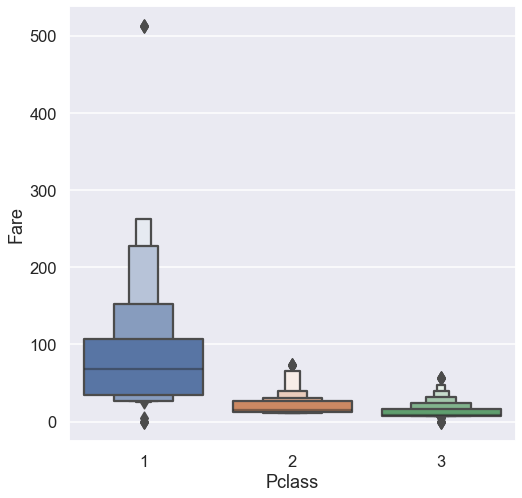

In [11]:
sns.set_context('talk',font_scale=1.0)
sns.color_palette('hls',8)
plt.figure(figsize=(8,8))
plt.xlabel('Clase')
plt.ylabel('Precio del pasaje')
sns.boxenplot(x='Pclass',y='Fare',data=train_df)

**3. Construya el mismo gráfico pero restringiendo los valores de `Fare` para que sean menores que el cuantil 95%  del vector inicial (para descartar valores atípicos que hacen que el gráfico sea menos claro).**

In [12]:
train_df['Fare'].describe(percentiles=[0.95])

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
50%       15.645850
95%      120.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
minfares=train_df[train_df['Fare']<120.0]
minfares.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
minfares['Fare'].max()

113.275

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

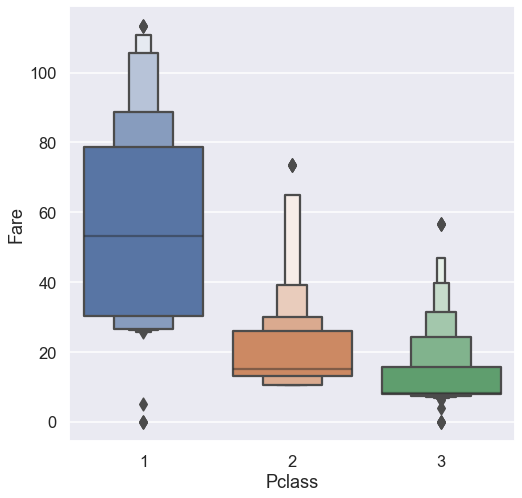

In [15]:
sns.set_context('talk',font_scale=1.0)
sns.color_palette('hls',8)
plt.figure(figsize=(8,8))
plt.xlabel('Clase')
plt.ylabel('Precio del pasaje')
sns.boxenplot(x='Pclass',y='Fare',data=minfares)

**4. ¿Cómo depende el porcentaje de pasajeros sobrevivientes del género de los pasajeros? Representarlo con `Seaborn.countplot` usando el argumento `hue`.**

In [16]:
surv = train_df[train_df['Survived']==1]
surv.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

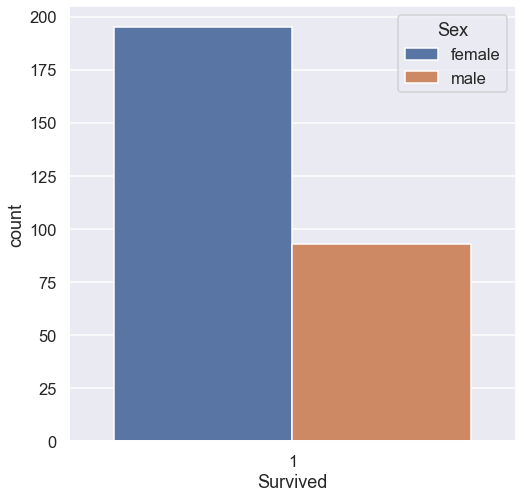

In [17]:
sns.set_context('talk',font_scale=1.0)
sns.color_palette('hls',8)
plt.figure(figsize=(8,8))
sns.countplot(x='Survived', data=surv, hue='Sex')

**5. ¿Cómo difiere la distribución de los precios de las entradas para los que sobrevivieron y los que no? Representarlo con `Seaborn.boxplot`**

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

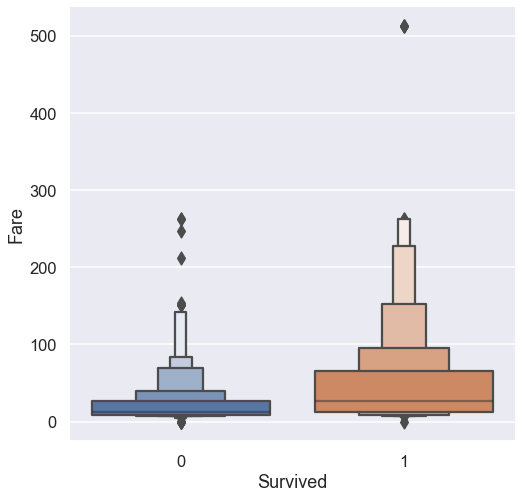

In [18]:
sns.set_context('talk',font_scale=1.0)
sns.color_palette('hls',8)
plt.figure(figsize=(8,8))
plt.xlabel('Clase')
plt.ylabel('Precio del pasaje')
#plt.plot(mean,years,linewidth=1.5,linestyle='--',label='Salario promedio',color='black')
sns.boxenplot(x='Survived',y='Fare',data=train_df)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

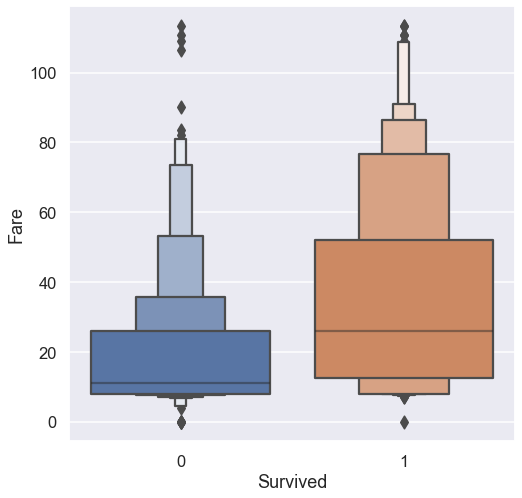

In [19]:
sns.set_context('talk',font_scale=1.0)
sns.color_palette('hls',8)
plt.figure(figsize=(8,8))
plt.xlabel('Clase')
plt.ylabel('Precio del pasaje')
#plt.plot(mean,years,linewidth=1.5,linestyle='--',label='Salario promedio',color='black')
sns.boxenplot(x='Survived',y='Fare',data=minfares)

**6. ¿Cómo depende la supervivencia de la edad de los pasajeros? Verifique (gráficamente) una suposición de que los jóvenes (<30 años) sobrevivieron con mayor frecuencia que las personas mayores (> 55 años).**

In [20]:
#Agrego otra columna 
train_df['Ages'] = train_df['Age'].apply(lambda x: 'Young' if x<30. else 'Middle aged'if 30.<=x<=55. else 'Old')
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ages
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle aged
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Middle aged
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Middle aged


<AxesSubplot:xlabel='Ages', ylabel='count'>

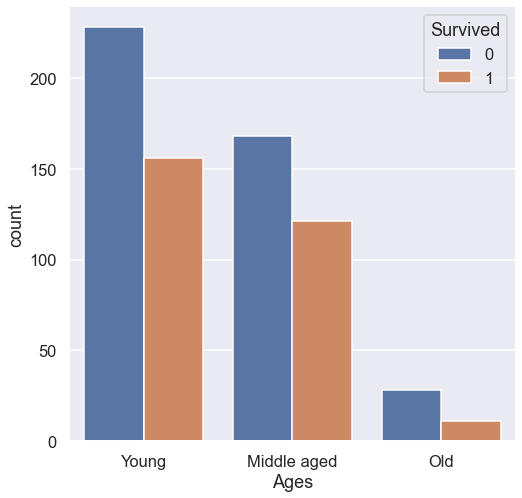

In [21]:
sns.set_context('talk',font_scale=1.0)
sns.color_palette('hls',8)
plt.figure(figsize=(8,8))
sns.countplot(x='Ages', data=train_df, hue='Survived')